## Visium two Modalities

In [23]:
import numpy as np
import pandas as pd
import mudata as md
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [24]:
from liana.method.sp._misty import misty
from liana.method.sp._misty import plot_distance_weights, plot_performance, plot_contribution, plot_importance

In [25]:
data_dir = Path("..") / "data"

We want to predict the signature aka footprints of cytokines using the expression of the cytokine in the surrounding cells. I.e. cytosig provides (as the name suggests signature of cytokines)

In [26]:
feature_map = pd.read_csv(f"{data_dir}/cytosig_map_mouse.csv", index_col=0)
interaction_tuples = list(zip(feature_map['gene'], feature_map['signature']))
predictors, targets = zip(*interaction_tuples)

In [27]:
mdata = md.read_h5mu(f"{data_dir}/f4hr.h5ad")
mdata

/Users/pschafer/miniconda3/envs/misty_liana/lib/python3.8/site-packages/mudata/_core/mudata.py:457: UserWarning: Cannot join columns with the same name because var_names are intersecting.


MuData object with n_obs × n_vars = 1847 × 15159
  uns:	'global_res', 'lr_tf_global', 'spatial', 'spatial_neighbors'
  obsm:	'spatial'
  obsp:	'spatial_connectivities', 'spatial_distances'
  11 modalities
    rna:	1847 x 13911
      obs:	'sample', 'leiden'
      var:	'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      uns:	'global_res', 'log1p', 'spatial', 'spatial_neighbors'
      obsm:	'cytosig_estimate', 'dorothea_estimate', 'local_scores', 'progeny_estimate', 'spatial', 'tangram_ct_pred'
      layers:	'counts'
      obsp:	'spatial_connectivities', 'spatial_distances'
    cytosig:	1847 x 43
      obs:	'sample', 'leiden'
      uns:	'log1p', 'spatial'
      obsm:	'cytosig_estimate', 'dorothea_estimate', 'progeny_estimate', 'spatial', 'tangram_ct_pred'
    progeny:	1847 x 14
      obs:	'sample', 'leiden'
      uns:	'log1p', 'spatial'
      obsm:	'cytosig_estimate', 'dorothea_estimate', 'progeny_estimate', 'spatial', 'tangram_ct_pred'
    dorothea:	1847 x 270
      obs:	'sample', 'leiden'
      uns:	'log1p', 'spatial'
      obsm:	'cytosig_estimate', 'dorothea_estimate', 'progeny_estimate', 'spatial', 'tangram_ct_pred'
    tangram:	1847 x 18
      obs:	'sample', 'leiden'
      uns:	'log1p', 'spatial'
      obsm:	'cytosig_estimate', 'dorothea_estimate', 'progeny_estimate', 'spatial', 'tangram_ct_pred'
    lrs:	1847 x 209
      obs:	'sample', 'leiden'
      uns:	'global_res', 'log1p', 'spatial', 'spatial_neighbors'
      obsm:	'cytosig_estimate', 'dorothea_estimate', 'local_scores', 'progeny_estimate', 'spatial', 'tangram_ct_pred'
      obsp:	'spatial_connectivities', 'spatial_distances'
    nmf:	1847 x 8
      obs:	'sample', 'leiden'
      uns:	'global_res', 'log1p', 'spatial', 'spatial_neighbors'
      obsm:	'NMF_W', 'cytosig_estimate', 'dorothea_estimate', 'local_scores', 'progeny_estimate', 'spatial', 'tangram_ct_pred'
    lig_cytosig:	1847 x 23
      obs:	'rna:sample', 'rna:leiden', 'cytosig:sample', 'cytosig:leiden', 'progeny:sample', 'progeny:leiden', 'dorothea:sample', 'dorothea:leiden', 'tangram:sample', 'tangram:leiden', 'lrs:sample', 'lrs:leiden', 'nmf:sample', 'nmf:leiden'
      uns:	'global_res', 'lr_tf_global', 'spatial', 'spatial_neighbors'
      obsm:	'cytosig', 'dorothea', 'lrs', 'nmf', 'progeny', 'rna', 'spatial', 'tangram'
      obsp:	'spatial_connectivities', 'spatial_distances'
    lrs_tf:	1847 x 407
      obs:	'rna:sample', 'rna:leiden', 'cytosig:sample', 'cytosig:leiden', 'progeny:sample', 'progeny:leiden', 'dorothea:sample', 'dorothea:leiden', 'tangram:sample', 'tangram:leiden', 'lrs:sample', 'lrs:leiden', 'nmf:sample', 'nmf:leiden'
      uns:	'global_res', 'lr_tf_global', 'spatial', 'spatial_neighbors'
      obsm:	'cytosig', 'dorothea', 'lrs', 'nmf', 'progeny', 'rna', 'spatial', 'tangram'
      obsp:	'spatial_connectivities', 'spatial_distances'
    progeny_nmf:	1847 x 112
      obs:	'rna:sample', 'rna:leiden', 'cytosig:sample', 'cytosig:leiden', 'progeny:sample', 'progeny:leiden', 'dorothea:sample', 'dorothea:leiden', 'tangram:sample', 'tangram:leiden', 'lrs:sample', 'lrs:leiden', 'nmf:sample', 'nmf:leiden'
      uns:	'global_res', 'lr_tf_global', 'spatial', 'spatial_neighbors'
      obsm:	'cytosig', 'dorothea', 'lrs', 'nmf', 'progeny', 'rna', 'spatial', 'tangram'
      obsp:	'spatial_connectivities', 'spatial_distances'
    tangram_nmf:	1847 x 144
      obs:	'rna:sample', 'rna:leiden', 'cytosig:sample', 'cytosig:leiden', 'progeny:sample', 'progeny:leiden', 'dorothea:sample', 'dorothea:leiden', 'tangram:sample', 'tangram:leiden', 'lrs:sample', 'lrs:leiden', 'nmf:sample', 'nmf:leiden'
      uns:	'global_res', 'lr_tf_global', 'spatial', 'spatial_neighbors'
      obsm:	'cytosig', 'dorothea', 'lrs', 'nmf', 'progeny', 'rna', 'spatial', 'tangram'
      obsp:	'spatial_connectivities', 'spatial_distances'

In [28]:
mdata = mdata[mdata.obs["rna:leiden"] != "5"]
mdata

View of MuData object with n_obs × n_vars = 1841 × 15159
  obsm:	'spatial'
  obsp:	'spatial_connectivities', 'spatial_distances'
  11 modalities
    rna:	1841 x 13911
      obs:	'sample', 'leiden'
      var:	'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      uns:	'global_res', 'log1p', 'spatial', 'spatial_neighbors'
      obsm:	'cytosig_estimate', 'dorothea_estimate', 'local_scores', 'progeny_estimate', 'spatial', 'tangram_ct_pred'
      layers:	'counts'
      obsp:	'spatial_connectivities', 'spatial_distances'
    cytosig:	1841 x 43
      obs:	'sample', 'leiden'
      uns:	'log1p', 'spatial'
      obsm:	'cytosig_estimate', 'dorothea_estimate', 'progeny_estimate', 'spatial', 'tangram_ct_pred'
    progeny:	1841 x 14
      obs:	'sample', 'leiden'
      uns:	'log1p', 'spatial'
      obsm:	'cytosig_estimate', 'dorothea_estimate', 'progeny_estimate', 'spatial', 'tangram_ct_pred'
    dorothea:	1841 x 270
      obs:	'sample', 'leiden'
      uns:	'log1p', 'spatial'
      obsm:	'cytosig_estimate', 'dorothea_estimate', 'progeny_estimate', 'spatial', 'tangram_ct_pred'
    tangram:	1841 x 18
      obs:	'sample', 'leiden'
      uns:	'log1p', 'spatial'
      obsm:	'cytosig_estimate', 'dorothea_estimate', 'progeny_estimate', 'spatial', 'tangram_ct_pred'
    lrs:	1841 x 209
      obs:	'sample', 'leiden'
      uns:	'global_res', 'log1p', 'spatial', 'spatial_neighbors'
      obsm:	'cytosig_estimate', 'dorothea_estimate', 'local_scores', 'progeny_estimate', 'spatial', 'tangram_ct_pred'
      obsp:	'spatial_connectivities', 'spatial_distances'
    nmf:	1841 x 8
      obs:	'sample', 'leiden'
      uns:	'global_res', 'log1p', 'spatial', 'spatial_neighbors'
      obsm:	'NMF_W', 'cytosig_estimate', 'dorothea_estimate', 'local_scores', 'progeny_estimate', 'spatial', 'tangram_ct_pred'
    lig_cytosig:	1841 x 23
      obs:	'rna:sample', 'rna:leiden', 'cytosig:sample', 'cytosig:leiden', 'progeny:sample', 'progeny:leiden', 'dorothea:sample', 'dorothea:leiden', 'tangram:sample', 'tangram:leiden', 'lrs:sample', 'lrs:leiden', 'nmf:sample', 'nmf:leiden'
      uns:	'global_res', 'lr_tf_global', 'spatial', 'spatial_neighbors'
      obsm:	'cytosig', 'dorothea', 'lrs', 'nmf', 'progeny', 'rna', 'spatial', 'tangram'
      obsp:	'spatial_connectivities', 'spatial_distances'
    lrs_tf:	1841 x 407
      obs:	'rna:sample', 'rna:leiden', 'cytosig:sample', 'cytosig:leiden', 'progeny:sample', 'progeny:leiden', 'dorothea:sample', 'dorothea:leiden', 'tangram:sample', 'tangram:leiden', 'lrs:sample', 'lrs:leiden', 'nmf:sample', 'nmf:leiden'
      uns:	'global_res', 'lr_tf_global', 'spatial', 'spatial_neighbors'
      obsm:	'cytosig', 'dorothea', 'lrs', 'nmf', 'progeny', 'rna', 'spatial', 'tangram'
      obsp:	'spatial_connectivities', 'spatial_distances'
    progeny_nmf:	1841 x 112
      obs:	'rna:sample', 'rna:leiden', 'cytosig:sample', 'cytosig:leiden', 'progeny:sample', 'progeny:leiden', 'dorothea:sample', 'dorothea:leiden', 'tangram:sample', 'tangram:leiden', 'lrs:sample', 'lrs:leiden', 'nmf:sample', 'nmf:leiden'
      uns:	'global_res', 'lr_tf_global', 'spatial', 'spatial_neighbors'
      obsm:	'cytosig', 'dorothea', 'lrs', 'nmf', 'progeny', 'rna', 'spatial', 'tangram'
      obsp:	'spatial_connectivities', 'spatial_distances'
    tangram_nmf:	1841 x 144
      obs:	'rna:sample', 'rna:leiden', 'cytosig:sample', 'cytosig:leiden', 'progeny:sample', 'progeny:leiden', 'dorothea:sample', 'dorothea:leiden', 'tangram:sample', 'tangram:leiden', 'lrs:sample', 'lrs:leiden', 'nmf:sample', 'nmf:leiden'
      uns:	'global_res', 'lr_tf_global', 'spatial', 'spatial_neighbors'
      obsm:	'cytosig', 'dorothea', 'lrs', 'nmf', 'progeny', 'rna', 'spatial', 'tangram'
      obsp:	'spatial_connectivities', 'spatial_distances'

How should we set the `l` parameter?

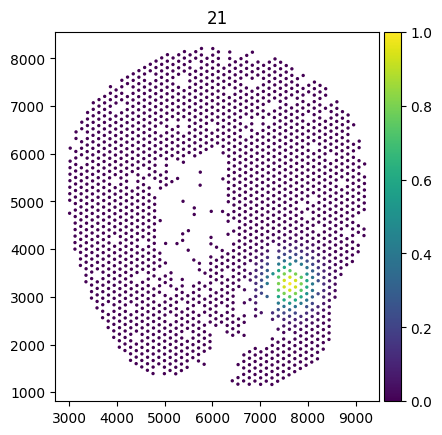

In [7]:
plot_distance_weights(mdata["rna"], bandwidth=500, kernel="gaussian", cells=[21], s=2)

Run misty without intraview and no grouping scheme:

In [8]:
misty(mdata, x_mod="rna", y_mod="cytosig", predictors=predictors, targets=targets, bandwidth=500, kernel="gaussian", bypass_intra=True, 
      add_juxta=False, add_self=False, group_intra_by=None, group_env_by=None)

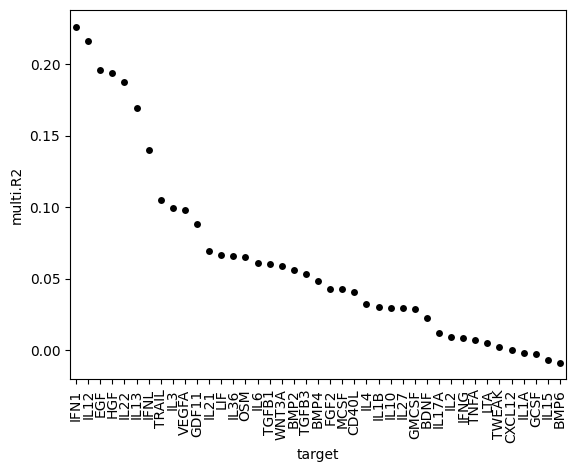

In [9]:
plot_performance(mdata.uns["misty_results"]["performances"], stat="multi.R2")

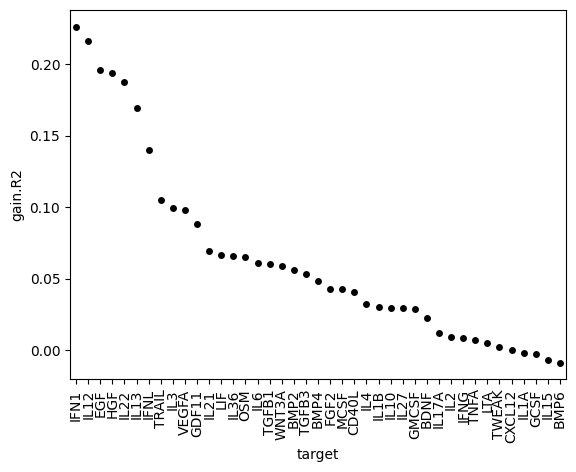

In [10]:
plot_performance(mdata.uns["misty_results"]["performances"], stat="gain.R2")

Run misty with different grouping schemes.

In [11]:
misty(mdata, x_mod="rna", y_mod="cytosig", predictors=predictors, targets=targets, bandwidth=500, kernel="gaussian", bypass_intra=False, 
      add_juxta=False, add_self=False, group_intra_by=None, group_env_by=None, overwrite=True)

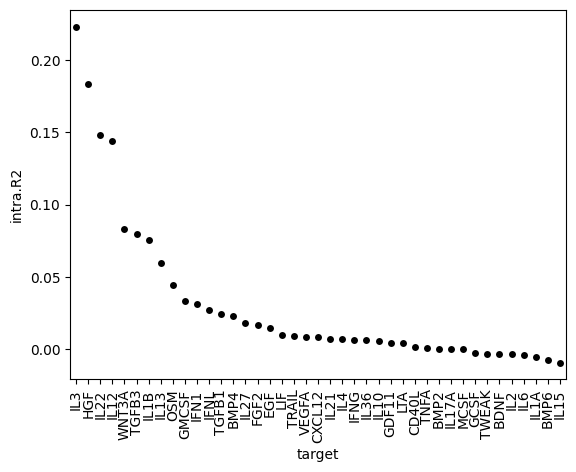

In [12]:
plot_performance(mdata.uns["misty_results"]["performances"], stat="intra.R2")

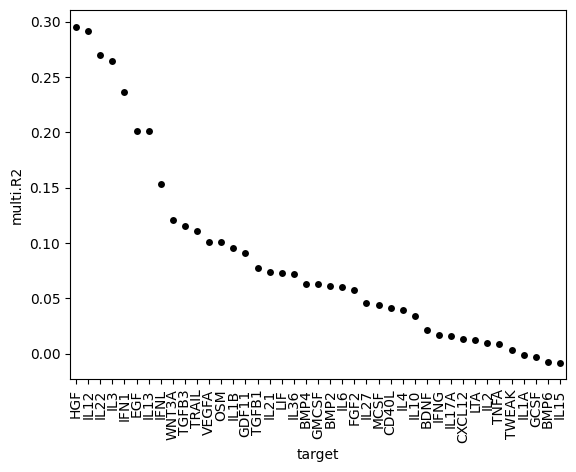

In [13]:
plot_performance(mdata.uns["misty_results"]["performances"], stat="multi.R2")

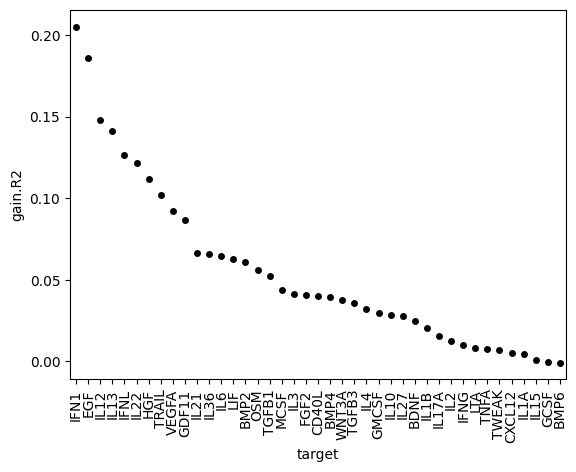

In [14]:
plot_performance(mdata.uns["misty_results"]["performances"], stat="gain.R2")

In [15]:
misty(mdata, x_mod="rna", y_mod="cytosig", predictors=predictors, targets=targets, bandwidth=500, kernel="gaussian", bypass_intra=False, 
      add_juxta=False, add_self=False, group_intra_by="leiden", group_env_by=None, overwrite=True)

In [16]:
misty(mdata, x_mod="rna", y_mod="cytosig", predictors=predictors, targets=targets, bandwidth=500, kernel="gaussian", bypass_intra=False, 
      add_juxta=False, add_self=False, group_intra_by=None, group_env_by="leiden", overwrite=True)

In [17]:
misty(mdata, x_mod="rna", y_mod="cytosig", predictors=predictors, targets=targets, bandwidth=500, kernel="gaussian", bypass_intra=False, 
      add_juxta=False, add_self=False, group_intra_by="leiden", group_env_by="leiden", overwrite=True)